In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import math
from scipy.spatial import Delaunay
import networkx as nx
print("Package Versions:")
print("Numpy: {}.".format(np.__version__))
print("Scipy: {}.".format(scipy.__version__))
print("MatPlotLib: {}.".format(matplotlib.__version__))
print("NetworkX: {}.".format(nx.__version__))

def euclid_distance(vector1, vector2):
    if vector1.shape[0] == 2:
        x = (vector1[0] - vector2[0])**2
        y = (vector1[1] - vector2[1])**2
        dist = math.sqrt(x + y)
        return(dist)
    elif vector1.shape[0] == 3:
        x = (vector1[0] - vector2[0])**2
        y = (vector1[1] - vector2[1])**2
        z = (vector1[2] - vector2[2])**2
        dist = math.sqrt(x + y + z)
        return(dist)
    else: print("error")

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

Package Versions:
Numpy: 1.16.5.
Scipy: 1.4.1.
MatPlotLib: 3.1.1.
NetworkX: 2.4.


In [2]:
# Canis lupus

wolf3d = np.array([[0.24833585,1.01541328,-0.62047035],
                   [0.38854408,-1.63396883,-0.39405662],
                   [-0.65563053,-0.67073452,-0.48318559],
                   [1.24512863,-0.60157454,-0.44650888],
                   [0.28114346,-0.66112220,-0.60801178],
                   [1.02634788,-1.30051661,-0.40551388],
                   [1.19387412,-0.97612000,-0.41851777],
                   [1.24769640,-0.60308766,-0.44630066],
                   [1.18623340,-0.17865112,-0.48281959],
                   [1.01119363,0.29542679,-0.53079319],
                   [0.71451420,-1.54757714,-0.39373681],
                   [0.76124078,-1.15915012,-0.46128607],
                   [0.76116902,-0.63356644,-0.52892536],
                   [0.71609050,0.03304994,-0.56085587],
                   [0.62356973,0.83573967,-0.59664267],
                   [0.38821632,-1.63653064,-0.39401504],
                   [0.32549366,-1.23258090,-0.48884663],
                   [0.28343973,-0.66375214,-0.60758662],
                   [0.25585625,0.08920586,-0.62038642],
                   [0.24968982,1.01220274,-0.61991197],
                   [0.04870030,-1.57000303,-0.40947777],
                   [-0.11051655,-1.19302428,-0.47841737],
                   [-0.18771458,-0.67004657,-0.55427259],
                   [-0.19008490,0.00321203,-0.58370197],
                   [-0.10931796,0.82404965,-0.61292118],
                   [-0.30782789,-1.34592330,-0.43144086],
                   [-0.55015391,-1.04166818,-0.45736480],
                   [-0.65549356,-0.67147726,-0.48322502],
                   [-0.62382740,-0.23404416,-0.51771313],
                   [-0.45615190,0.27145034,-0.55848539]])
pit = wolf3d[:,0:2]

In [3]:
# Panthera leo
lion3d = np.array([[0.13277972,3.27308893,-0.68660229],
                   [0.48533183,-3.17744446,-0.14515674],
                   [-1.92741406,-0.89924282,-0.32623410],
                   [2.41466284,-0.78136098,-0.27562308],
                   [0.34522101,-0.89278442,-1.17132652],
                   [1.94670010,-2.29067206,-0.16648942],
                   [2.36395454,-1.60367489,-0.20384136],
                   [2.49180174,-0.76248437,-0.28315955],
                   [2.32728863,0.25907075,-0.41265601],
                   [1.86578918,1.47028184,-0.49542564],
                   [1.23484313,-3.02313471,-0.15101546],
                   [1.41802800,-2.09483409,-0.44142896],
                   [1.44020700,-0.81551743,-0.71598101],
                   [1.27119803,0.86141843,-0.75148535],
                   [0.96915865,2.90023160,-0.66408604],
                   [0.48559701,-3.30128813,-0.13080424],
                   [0.42402923,-2.29265523,-0.55728614],
                   [0.34549731,-0.89465630,-1.17127299],
                   [0.24644791,1.03832793,-0.93763852],
                   [0.13852412,3.37453985,-0.70229083],
                   [-0.30335283,-3.11698031,-0.19617182],
                   [-0.62953889,-2.19712687,-0.53362191],
                   [-0.79783714,-0.89881343,-0.74204105],
                   [-0.80002034,0.80319828,-0.77533954],
                   [-0.63722456,2.85745692,-0.72170931],
                   [-1.14003611,-2.46436667,-0.26012141],
                   [-1.75936997,-1.78842807,-0.29034477],
                   [-2.00059938,-0.92154986,-0.31720147],
                   [-1.86566484,0.13942426,-0.42206538],
                   [-1.37624347,1.39460731,-0.54697019]])
pit = lion3d[:,0:2]

In [4]:
# Panthera onca

jaguar3d = np.array([[0.18729861,2.13774610,-0.72044176],
                     [0.46614194,-2.53997755,-0.28872830],
                     [-1.26006985,-0.79673612,-0.38004911],
                     [1.86432588,-0.75047499,-0.30702734],
                     [0.24879470,-0.60571951,-0.92018253],
                     [1.50451648,-1.81868005,-0.27874440],
                     [1.78615808,-1.33573222,-0.27431697],
                     [1.86468303,-0.75245237,-0.30680573],
                     [1.73505354,-0.06495798,-0.38254780],
                     [1.40820956,0.73419815,-0.49191457],
                     [0.99389499,-2.34325290,-0.28580511],
                     [1.06069684,-1.56144404,-0.45665556],
                     [1.04591870,-0.61773700,-0.61624217],
                     [0.94790310,0.49643260,-0.64497364],
                     [0.78385139,1.77325511,-0.67165321],
                     [0.46664310,-2.53930378,-0.28867942],
                     [0.33964998,-1.66125607,-0.59087622],
                     [0.24950850,-0.60762870,-0.91993773],
                     [0.19432983,0.68045205,-0.80710578],
                     [0.18796250,2.13421297,-0.72013217],
                     [-0.08186674,-2.41166162,-0.30825192],
                     [-0.37263453,-1.61367702,-0.50268459],
                     [-0.51258337,-0.64653170,-0.65545285],
                     [-0.51941526,0.49693495,-0.66560197],
                     [-0.37403810,1.81081700,-0.68200040],
                     [-0.65323937,-1.95611930,-0.31657928],
                     [-1.07882380,-1.43129230,-0.34708288],
                     [-1.25921428,-0.79791963,-0.37989217],
                     [-1.20512295,-0.05680764,-0.44243008],
                     [-0.90877426,0.79994482,-0.54259604]])
pit = jaguar3d[:,0:2]

In [5]:
# Panthera pardus

leopard3d = np.array([[0.23229247,0.97465676,-0.59887862],
                      [0.36852160,-1.61338162,-0.35897508],
                      [-0.53904426,-0.72695279,-0.45375183],
                      [1.18648934,-0.67969620,-0.42211154],
                      [0.25861716,-0.55621737,-0.73500806],
                      [0.95776981,-1.25978279,-0.37923396],
                      [1.13462043,-1.00501394,-0.40148664],
                      [1.18695259,-0.67933768,-0.42210877],
                      [1.11329150,-0.28500086,-0.45951253],
                      [0.91265965,0.18339342,-0.49622861],
                      [0.66193521,-1.51959920,-0.37142903],
                      [0.70669019,-1.09359241,-0.47369409],
                      [0.70640874,-0.57268083,-0.57889384],
                      [0.65310305,0.05034643,-0.59397876],
                      [0.55797058,0.77511531,-0.56896329],
                      [0.36962691,-1.61276627,-0.35889265],
                      [0.30642867,-1.13053846,-0.51340020],
                      [0.25928345,-0.55608964,-0.73486799],
                      [0.23272276,0.15557688,-0.66223449],
                      [0.23293304,0.97396535,-0.59867382],
                      [0.08111906,-1.54357815,-0.37710041],
                      [-0.07437602,-1.11652517,-0.48627213],
                      [-0.15359113,-0.59510791,-0.59632462],
                      [-0.14894414,0.03769994,-0.61092234],
                      [-0.06422690,0.77554637,-0.60169423],
                      [-0.20616823,-1.30779624,-0.40438774],
                      [-0.44014120,-1.05692172,-0.42790297],
                      [-0.53928030,-0.72681415,-0.45379880],
                      [-0.50437820,-0.31686640,-0.50297856],
                      [-0.33952743,0.18258983,-0.55168629]])
pit = leopard3d[:,0:2]

In [6]:
# Ursus arctos

bear3d = np.array([[0.19605236,1.40639138,-0.62101412],
                   [0.35408443,-1.95081210,-0.32452407],
                   [-0.74894571,-0.70320004,-0.43760484],
                   [1.34314132,-0.65355015,-0.41417563],
                   [0.33895805,-0.67643404,-0.77493584],
                   [1.12950706,-1.41855383,-0.36902934],
                   [1.32899320,-1.07580113,-0.38621974],
                   [1.38189006,-0.65268660,-0.41417295],
                   [1.28535366,-0.14395294,-0.47009996],
                   [1.03893232,0.45681012,-0.51901090],
                   [0.73507118,-1.80882835,-0.33974338],
                   [0.84277010,-1.30436420,-0.45533130],
                   [0.85752946,-0.64625788,-0.57056439],
                   [0.78093100,0.18157631,-0.58944279],
                   [0.60146427,1.17100334,-0.61149651],
                   [0.35411108,-1.95096231,-0.32414892],
                   [0.35423917,-1.39557743,-0.51508987],
                   [0.33920878,-0.67707258,-0.77479649],
                   [0.27914366,0.27568549,-0.68297482],
                   [0.19644307,1.40603185,-0.62090635],
                   [-0.01621491,-1.85313463,-0.35220611],
                   [-0.14475518,-1.34072089,-0.49024647],
                   [-0.21302611,-0.68363762,-0.62912929],
                   [-0.22714233,0.15233666,-0.63021612],
                   [-0.17691332,1.15681553,-0.61541295],
                   [-0.37701368,-1.50680780,-0.38874495],
                   [-0.66507083,-1.14581609,-0.41428068],
                   [-0.78663850,-0.70308226,-0.43709999],
                   [-0.74053490,-0.18406004,-0.48100251],
                   [-0.53181064,0.42329258,-0.54177046]])
pit = bear3d[:,0:2]

In [7]:
# Vulpes vulpes

fox3d = np.array([[0.26153874,0.61186606,-0.57862389],
                  [0.34425330,-1.32168627,-0.40034369],
                  [-0.38282496,-0.71350199,-0.45008773],
                  [0.98533207,-0.65433294,-0.42543164],
                  [0.29687646,-0.53505605,-0.68805707],
                  [0.80719805,-1.10755658,-0.40090770],
                  [0.96099269,-0.91183442,-0.40900278],
                  [1.01499403,-0.65318984,-0.42466229],
                  [0.96891975,-0.33170813,-0.46276778],
                  [0.82469261,0.05262130,-0.51513684],
                  [0.57654202,-1.27299786,-0.39761835],
                  [0.63532925,-0.94795305,-0.49605882],
                  [0.65067077,-0.55282700,-0.57497907],
                  [0.61687863,-0.07286838,-0.57894182],
                  [0.53522980,0.48880929,-0.56777698],
                  [0.34623164,-1.33687830,-0.39859825],
                  [0.31799051,-0.97010148,-0.54299533],
                  [0.29722291,-0.53416288,-0.68804181],
                  [0.27684781,0.00393820,-0.63753355],
                  [0.26093295,0.62734157,-0.58041120],
                  [0.11678973,-1.30000877,-0.40919209],
                  [0.00072968,-0.97537708,-0.50591260],
                  [-0.05839902,-0.58055937,-0.57710505],
                  [-0.05808532,-0.09973747,-0.59157753],
                  [-0.00158232,0.46612126,-0.57735598],
                  [-0.11399695,-1.16096544,-0.42330655],
                  [-0.32009959,-0.97104049,-0.43050712],
                  [-0.41206086,-0.71369720,-0.45092097],
                  [-0.38915145,-0.38724357,-0.48641840],
                  [-0.25023478,0.00921714,-0.52511895]])
pit = fox3d[:,0:2]

In [8]:
# Crocuta crocuta

hyena3d = np.array([[0.18486275,1.97482419,-0.66892886],
                    [0.42283884,-2.30041051,-0.29128844],
                    [-1.21668112,-0.84313869,-0.45099545],
                    [1.86564457,-0.78810716,-0.38685647],
                    [0.26161087,-0.62500566,-0.75820076],
                    [1.40580726,-1.74602056,-0.32190347],
                    [1.75522888,-1.34362614,-0.35300231],
                    [1.86575639,-0.78964090,-0.38661402],
                    [1.73401046,-0.09058386,-0.47023880],
                    [1.36320543,0.76827353,-0.54213297],
                    [0.91863036,-2.20287967,-0.29816782],
                    [1.03289616,-1.52310109,-0.43942750],
                    [1.04502356,-0.64425486,-0.56861514],
                    [0.95017332,0.43830389,-0.62607896],
                    [0.75550073,1.72942424,-0.64006966],
                    [0.42382243,-2.37441254,-0.28118682],
                    [0.32871416,-1.60104990,-0.48521370],
                    [0.26184672,-0.62602484,-0.75790381],
                    [0.20517945,0.60556251,-0.71026254],
                    [0.18480895,2.04630733,-0.67862803],
                    [-0.08450264,-2.26443958,-0.31639868],
                    [-0.35916549,-1.56682372,-0.46559942],
                    [-0.49508655,-0.67725348,-0.61495513],
                    [-0.49150205,0.41687888,-0.66261137],
                    [-0.34840852,1.71105528,-0.68424243],
                    [-0.60603118,-1.86707163,-0.35091621],
                    [-1.03358710,-1.42401695,-0.40536523],
                    [-1.21688557,-0.84277534,-0.45090944],
                    [-1.15613008,-0.12629968,-0.52918613],
                    [-0.84782302,0.73093790,-0.59949213]])
pit = hyena3d[:,0:2]

In [9]:
# Lycaon pictus

licaon3d = np.array([[0.17877616,1.73467755,-0.62690419],
                     [0.40964121,-2.24521208,-0.27396905],
                     [-1.10413098,-0.77617884,-0.41212124],
                     [1.73245192,-0.69224072,-0.34837270],
                     [0.28452072,-0.63680983,-0.90824306],
                     [1.35588574,-1.68456578,-0.29829177],
                     [1.65251207,-1.24134326,-0.33127719],
                     [1.75368702,-0.69396961,-0.34903648],
                     [1.63721752,-0.05190912,-0.43788463],
                     [1.31221187,0.69493407,-0.51558775],
                     [0.88898629,-2.20988679,-0.28477412],
                     [1.00125968,-1.47285604,-0.46878797],
                     [1.00723672,-0.60410857,-0.62102997],
                     [0.92243618,0.41594738,-0.67471802],
                     [0.72464526,1.59051156,-0.61652398],
                     [0.40650427,-2.40311980,-0.26193184],
                     [0.34332353,-1.56897855,-0.54723382],
                     [0.28520086,-0.63614273,-0.90793407],
                     [0.23600248,0.56548458,-0.77488375],
                     [0.18345581,1.89073110,-0.63768488],
                     [-0.08783698,-2.27882981,-0.28918600],
                     [-0.31133646,-1.52410102,-0.47348902],
                     [-0.42131257,-0.63558865,-0.64625186],
                     [-0.42485690,0.39592975,-0.67991167],
                     [-0.31889224,1.58858657,-0.63777727],
                     [-0.59921539,-1.82927561,-0.32965493],
                     [-0.97110426,-1.35386300,-0.36416972],
                     [-1.12425303,-0.77535230,-0.41159630],
                     [-1.06146061,-0.09778309,-0.49809581],
                     [-0.78179741,0.68994397,-0.56806886]])
pit = licaon3d[:,0:2]


 Geometric Morphometric Landmark Coordinates 
 30-Landmark Model 



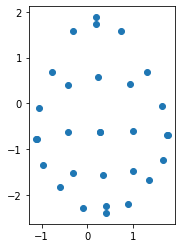

Landmark Traingulation 
Number of Triads: 42  



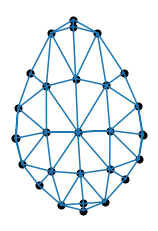

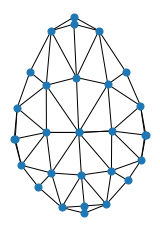

In [10]:
plt.scatter(pit[:,0], pit[:,1])
plt.axis("scaled")
print("\n Geometric Morphometric Landmark Coordinates \n",
      "%.1d-Landmark Model \n" % pit.shape[0])
plt.show()
tri = Delaunay(pit)
print("Landmark Traingulation \nNumber of Triads: %.1d " % tri.simplices.shape[0], "\n")
plt.triplot(pit[:,0], pit[:,1], tri.simplices)
plt.scatter(pit[:,0], pit[:,1], c = "black", s = 50)
plt.axis("scaled")
plt.axis("off")
plt.show()
edges = []
for i in range(tri.simplices.shape[0]):
    triangle = tri.simplices[i]
    triangle_edges = np.stack(([triangle[0], triangle[1]],
                               [triangle[0],triangle[2]],
                               [triangle[1], triangle[2]]))
    edges = np.append(edges, triangle_edges)
edges = edges.astype(int)
edges = edges.reshape((int(edges.shape[0]/2),2))
nodes = list(range(0, pit.shape[0]))

# Visualize mesh using NetworkX Graph library

G = nx.Graph()
for node in nodes:
    G.add_node(node, name = ("LM" + str(node + 1)))
for edge in edges:
    G.add_edge(edge[0], edge[1])
nx.draw_networkx_nodes(G, pos = pit, node_size = 50)
nx.draw_networkx_edges(G, pos = pit)
plt.axis("scaled")
plt.axis("off")
plt.show()

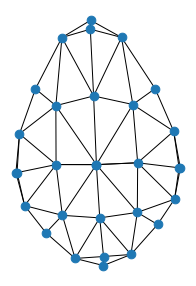

In [11]:
plt.figure(figsize = (10,5))
nx.draw_networkx_nodes(G, pos = pit, node_size = 75)
nx.draw_networkx_edges(G, pos = pit)
plt.axis("scaled")
plt.axis("off")
plt.savefig("Visualization.svg")
plt.show()